# NCAAB Exploratory Data Analysis and Linear Regression
Here, I will use the 2021 season from an NCAAB [dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset) to build a linear regression model using several team statistical measures that I believe will capture a team's winning percentage (wins / total games) during the season. I will extend this model to previous seasons to see how well it can generalize across years.

## 1) Loading data and libraries
I will be using a subset of the dataset linked above from the 2021 season to build the model. We must first load some useful data organization and visualization libraries as well as our .csv data.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import train_test_split and regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Below, I will make a new column for win percentage (WIN_PERC), which is simply wins (W) divided by total games played (G), with 1 indicating a perfect season of wins and 0 indicating a season with 0 wins. We can also get an idea of how many rows (in this case basketball teams) are present in our data.

In [2]:
#load the 2021 season dataset, add a win percentage variable, and look at the variable types
bb = pd.read_csv('cbb21.csv')
bb['WIN_PERC'] = bb['W']/bb['G']
bb.insert(4, 'WIN_PERC', bb.pop('WIN_PERC'))
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEAM      347 non-null    object 
 1   CONF      347 non-null    object 
 2   G         347 non-null    int64  
 3   W         347 non-null    int64  
 4   WIN_PERC  347 non-null    float64
 5   ADJOE     347 non-null    float64
 6   ADJDE     347 non-null    float64
 7   BARTHAG   347 non-null    float64
 8   EFG_O     347 non-null    float64
 9   EFG_D     347 non-null    float64
 10  TOR       347 non-null    float64
 11  TORD      347 non-null    float64
 12  ORB       347 non-null    float64
 13  DRB       347 non-null    float64
 14  FTR       347 non-null    float64
 15  FTRD      347 non-null    float64
 16  2P_O      347 non-null    float64
 17  2P_D      347 non-null    float64
 18  3P_O      347 non-null    float64
 19  3P_D      347 non-null    float64
 20  ADJ_T     347 non-null    float6

### Variable descriptions (from kaggle link)

TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in

G: Number of games played

W: Number of games won 

WIN_PERC: W/G

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

SEED: Seed in the NCAA March Madness Tournament

## 2) Exploratory Data Analysis and Visualization
With the data loaded, we can now begin to explore some trends and visualize the relationships between the variables included.

In [3]:
bb.describe()

,G,W,WIN_PERC,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,68.000000
mean,22.221902,12.060519,0.534490,101.921902,101.940922,0.493132,49.994236,50.224207,18.972911,18.900865,...,27.974063,31.605187,31.887032,49.702017,49.924207,33.663689,33.838040,68.428530,-5.816715,8.794118
std,4.040944,5.273373,0.198546,7.264347,6.148603,0.258964,3.111116,2.879877,2.259102,2.259066,...,3.174413,4.701288,5.499887,3.485755,3.431433,2.731555,2.492589,2.689837,5.278143,4.698551
min,5.000000,0.000000,0.000000,80.000000,86.300000,0.008700,41.300000,42.900000,13.300000,12.600000,...,19.700000,19.600000,19.700000,38.300000,41.600000,25.100000,26.100000,59.900000,-17.800000,1.000000
25%,20.000000,8.500000,0.400000,97.200000,97.600000,0.273100,48.000000,48.100000,17.250000,17.500000,...,25.700000,28.100000,28.000000,47.350000,47.400000,31.900000,32.250000,66.500000,-9.400000,5.000000
50%,23.000000,12.000000,0.550000,101.700000,102.000000,0.488200,50.000000,50.100000,18.900000,18.700000,...,27.900000,31.400000,31.600000,49.700000,49.900000,33.700000,33.900000,68.300000,-6.100000,9.000000
75%,25.000000,16.000000,0.684211,106.700000,106.200000,0.719250,51.850000,52.100000,20.600000,20.300000,...,30.250000,34.600000,35.100000,51.850000,52.100000,35.500000,35.500000,70.300000,-2.500000,13.000000
max,30.000000,26.000000,1.052632,125.400000,120.800000,0.979100,61.000000,60.100000,25.000000,26.700000,...,37.900000,44.000000,55.300000,64.000000,60.600000,41.800000,41.000000,77.100000,8.900000,16.000000


The above summary statistics are helpful in getting a snapshot of the data. In this case, we can see that there is a team that is listed as having a win percentage above 1, which is not possible - let's take care of that below. 

As far as variables I am interested in testing, I restricted my analysis to not include G and W, as those are directly included in WIN_PERC calculation. I was also not concerned about the team's postseason performance, so I removed SEED and WAB. Lastly, the BARTHAG variable was a bit cryptic to me, so I removed that as well. 

In [4]:
#it is Southern Utah, so let's drop that row
southern_utah = bb[bb['WIN_PERC'] > 1].index
bb.drop(southern_utah, inplace=True)

#let's also drop some of the columns that are not of interest at this time
bb.drop(['G', 'W', 'SEED', 'WAB', 'BARTHAG'], axis=1, inplace=True)

NCAAB is paritioned out into conferences, typically organized by the region that the school is located in; for example, the Atlantic Coast Conference (ACC) includes schools like University of North Carolina, University of Virginia, and Clemson University. 

I thought it would be interesting to see the brakdown of win percentage by conference. Although I will not use this information for the current analysis, conference is certainly a factor I would like to account for in future models.

In [5]:
#here is a list of how many schools make up each conference
bb.value_counts('CONF')

CONF
ACC     15
A10     14
CUSA    14
SEC     14
B10     14
Slnd    13
SB      12
P12     12
OVC     12
Horz    12
MAC     12
BSth    11
MAAC    11
MWC     11
Amer    11
BE      11
BW      11
CAA     10
Pat     10
AE      10
SWAC    10
SC      10
B12     10
NEC     10
MVC     10
BSky    10
WCC     10
ASun     9
MEAC     9
Sum      9
WAC      9
dtype: int64

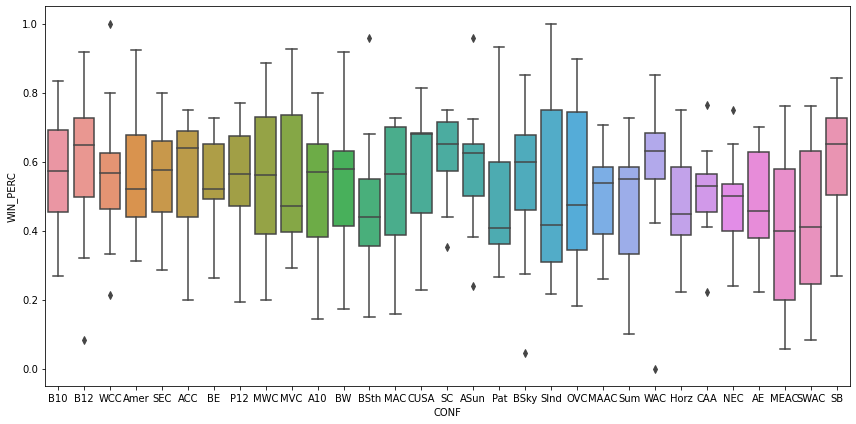

In [6]:
#let's take a quick look at the win percentage grouped by conference - there are differences in 
#win perc between conferences, but there is plenty of variation as well
plt.figure(figsize=(12,6))
sns.boxplot(x='CONF', y='WIN_PERC', data=bb)
plt.tight_layout()

For a more targeted exploration of the associations that might relate to win percentage, we can get a wide-scale view of distributions and scatter plots between all combinations of variables. 

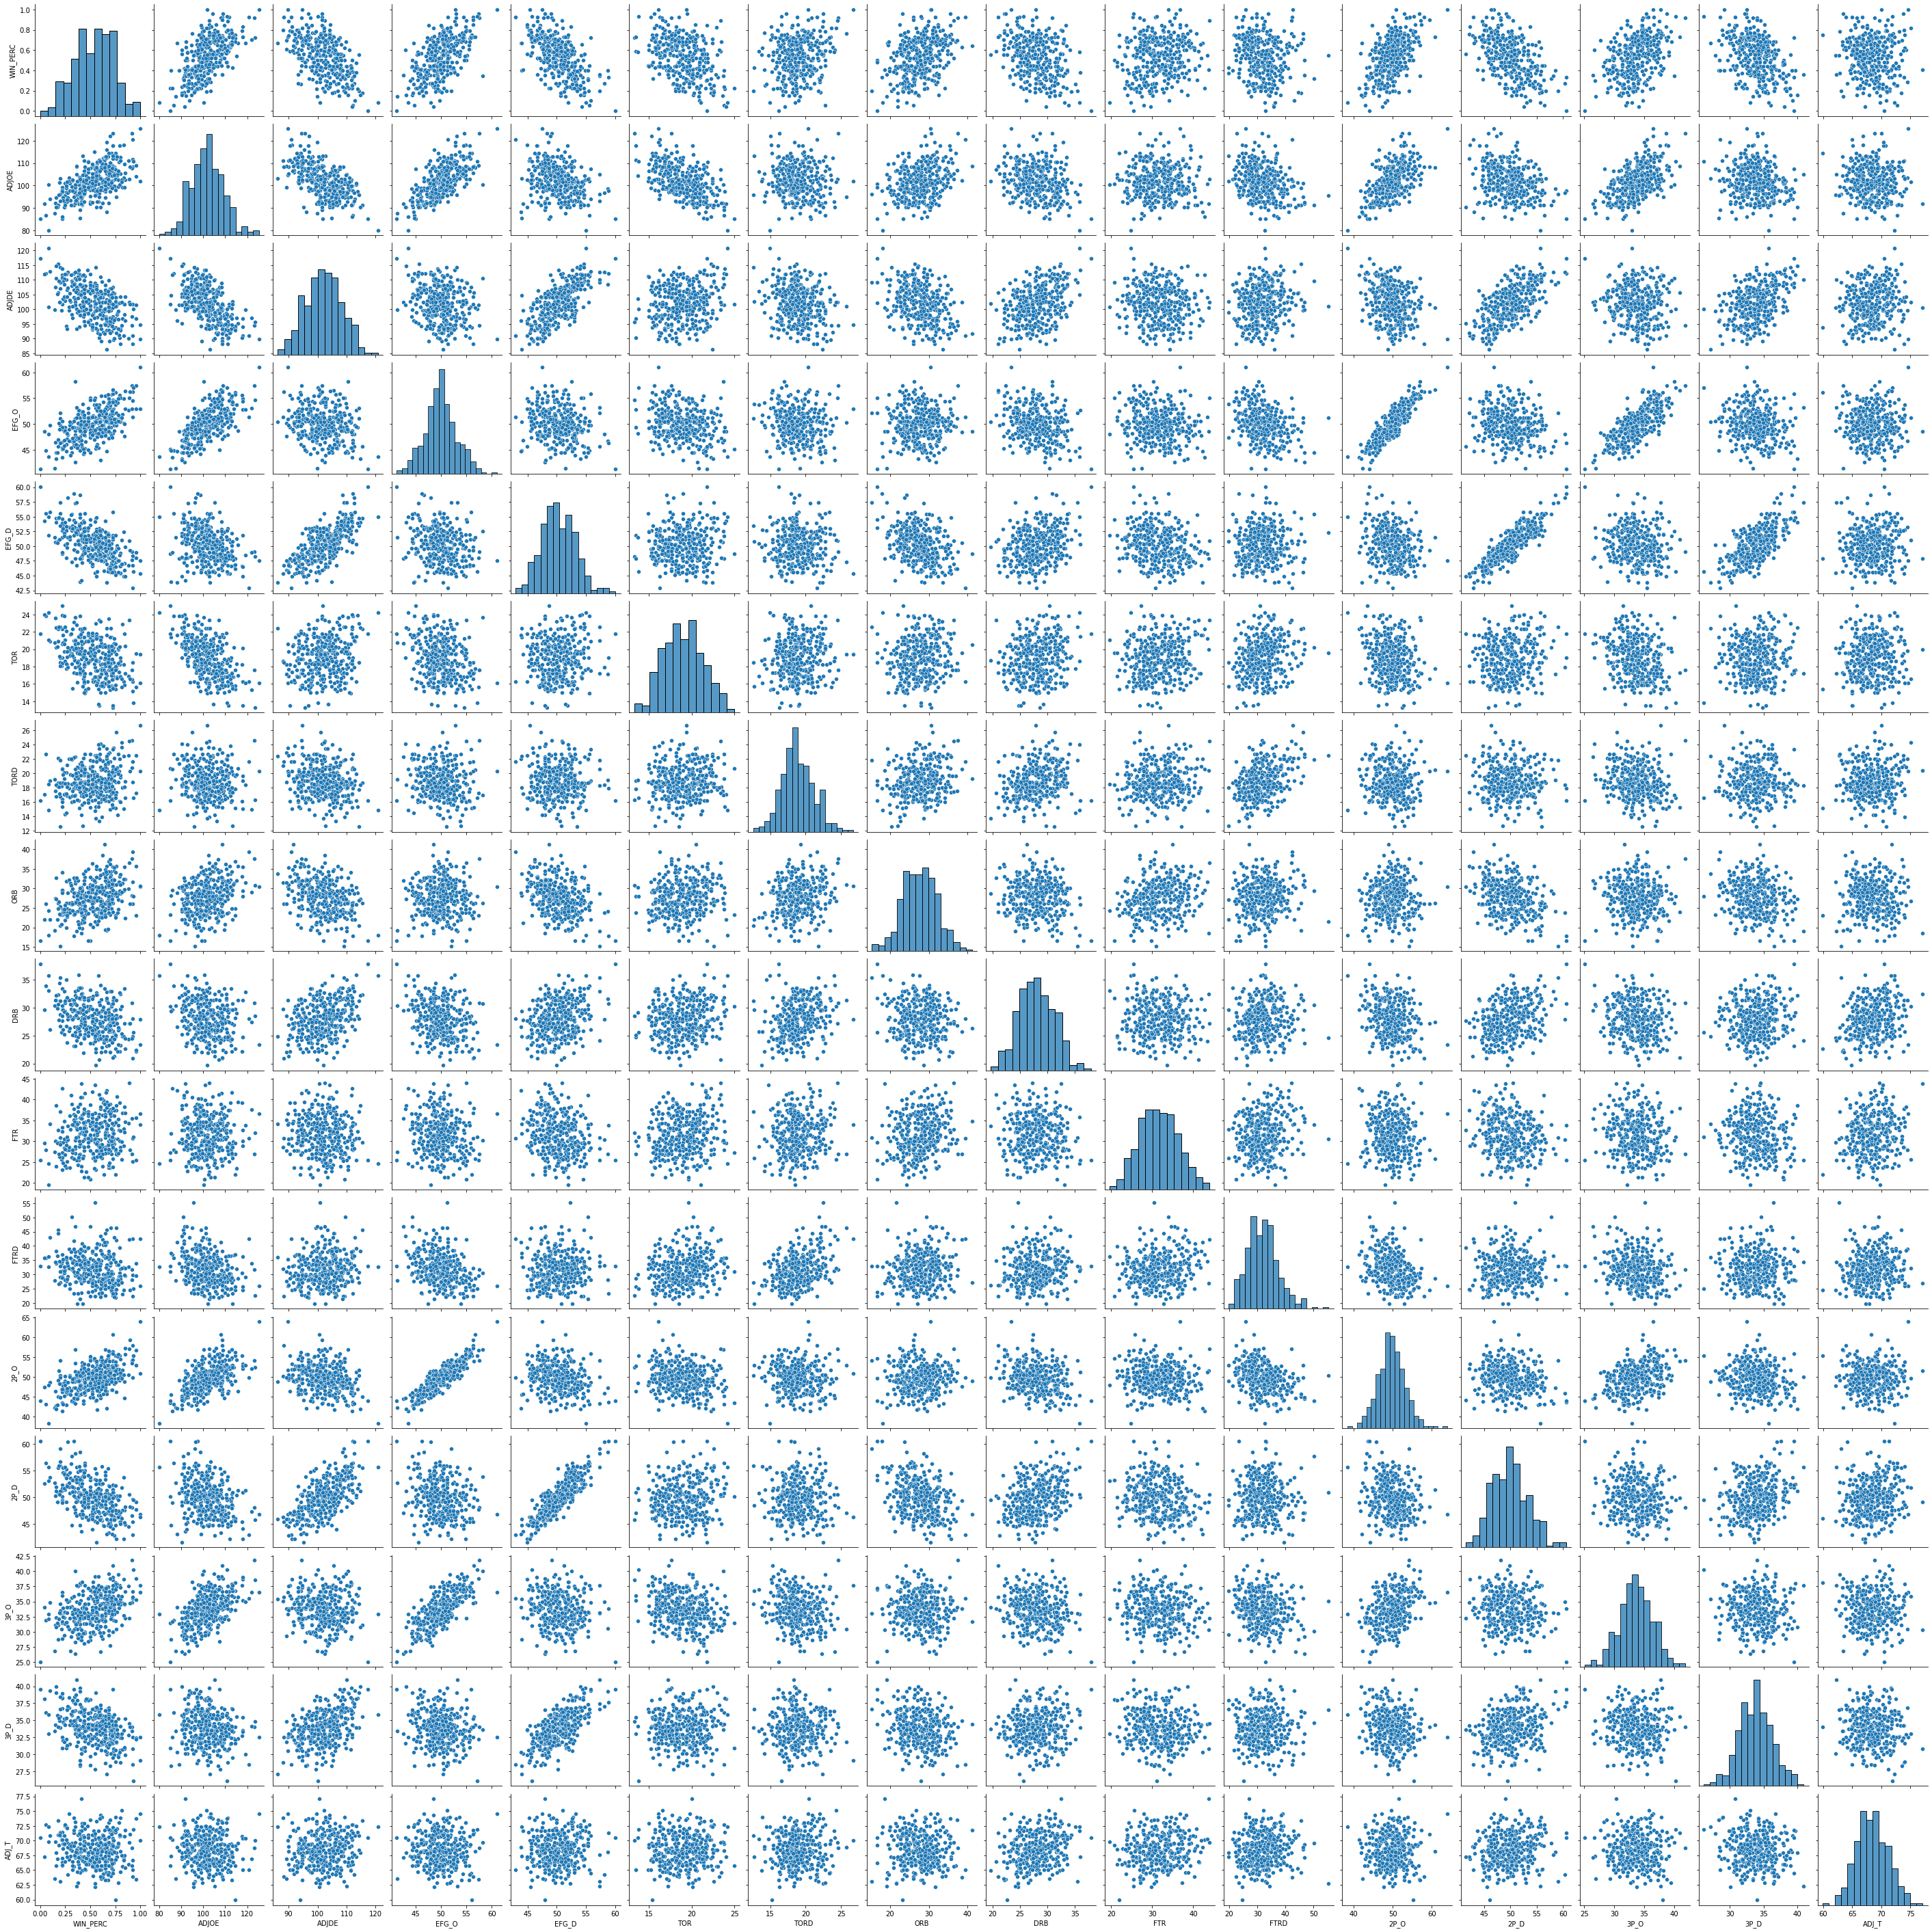

In [7]:
sns.pairplot(bb)

<AxesSubplot:>

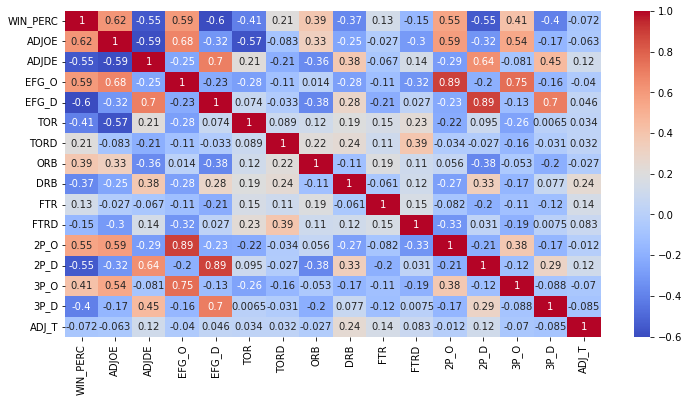

In [8]:
#we can take a look at a heatmap showing the correlation matrix between all variables as well
plt.figure(figsize=(12,6))
sns.heatmap(data=bb.corr(), annot=True, cmap='coolwarm')

### Some thoughts before implementing the model:

1. It seems that most of the variables have relatively normal distributions, which is good

2.  There are several variables highly correlated with our target of win perc, but there are also some that are more correlated with one another than with win perc (potential multicollinearity). In future projects, I will attempt to account for this potential issue, but for now I will continue on with a model that includes all remaining relevant variables.

## 3) Model Training

We will now put all the quantitative variables into a linear regression model for a training set of 80% of our data. Therefore, we will remove TEAM and CONF from our X (predictors) as well as WIN_PERC, which will now become the target variable, or y.

In [9]:
#define predictors and target columns
X = bb.drop(['WIN_PERC', 'TEAM', 'CONF'], axis=1)
y = bb['WIN_PERC']

X.head()

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
0,118.1,91.1,54.9,44.9,16.3,15.1,29.4,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9
1,123.2,94.5,57.5,49.1,17.6,24.6,37.5,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8
2,117.7,90.4,55.6,46.6,18.2,16.1,33.0,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7
3,125.4,89.8,61.0,47.5,16.1,20.3,30.4,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6
4,123.5,95.7,54.6,48.3,13.3,16.3,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0


In [10]:
#set up the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [11]:
#fit model with training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
#print some information about our model
print('Intercept: ', lm.intercept_)
print('R Square: ', lm.score(X_train, y_train))
print(pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff']))

Intercept:  0.20083710317003411
R Square:  0.7735767739872468
          Coeff
ADJOE  0.000362
ADJDE  0.004874
EFG_O  0.017500
EFG_D -0.002042
TOR   -0.027429
TORD   0.030221
ORB    0.009730
DRB   -0.010667
FTR    0.003876
FTRD  -0.004126
2P_O   0.003936
2P_D  -0.015782
3P_O   0.005838
3P_D  -0.019084
ADJ_T  0.000799


### Some interpretation:

1. The mean winning percentage when all of these variables are 0 is ~0.20

2. This model can account for ~77% of the variance in winning percentage

3. The most robust predictor is TORD (a measure of how good a team is at forcing turnovers)...a 1 unit increase in this variable (with all else constant) leads to an increase of about 0.03 in win perc


## 4) Model Testing
We have reserved 20% of our data for testing. The next step is to make predictions with our model based on these untrained test data and see how our predictions compare to the actual target values. 

In [13]:
#make predictions on the test data set aside from earlier
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='Predicted Win Perc', ylabel='Actual Win Perc'>

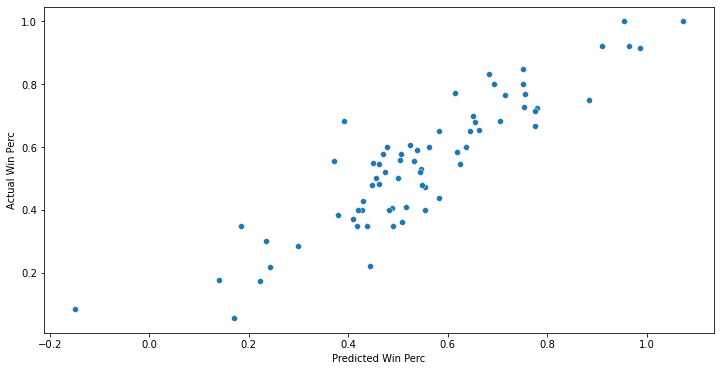

In [14]:
#make a scatter to see how our predictions compared to the real values - not too bad!
plt.figure(figsize=(12,6))
plt.xlabel('Predicted Win Perc')
plt.ylabel('Actual Win Perc')
sns.scatterplot(x=predictions, y=y_test)

This scatter plot shows a comparison of our model predictions vs. the actual values of win perc. A straight line along the diagonal would indicate a perfect fit, so the model does pretty well accounting for these test data. Below, the histogram shows the distribution of residuals (actual-predicted values), and the majority of residuals are near 0 which is a great sign.

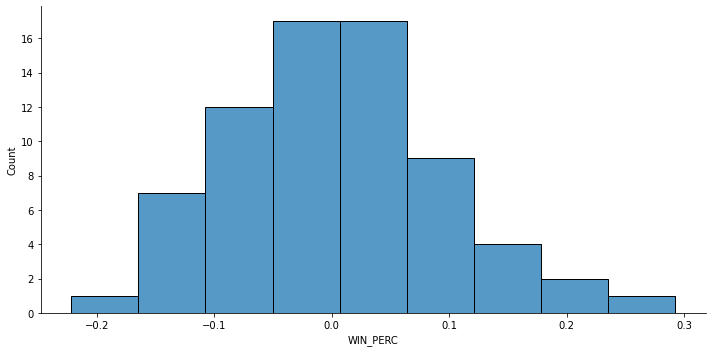

In [15]:
#we can also take a look at the distribution of residuals - maybe a bit right skewed but not too bad
sns.displot((y_test-predictions), height=5, aspect=2)

In [16]:
print('R Square: ', lm.score(X_test, y_test)) #variance accounted for by model
print('MAE: ', metrics.mean_absolute_error(y_test, predictions)) #avg of absoluate value of residuals
print('MSE: ', metrics.mean_squared_error(y_test, predictions)) #variance of residuals (avg of squared difference)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #stdev of residuals (sqrt of MSE)

R Square:  0.7964631683621921
MAE:  0.07388119583975247
MSE:  0.008891424894759761
RMSE:  0.09429435240118976


### Interpretation

1. Our model accounts for almost 80% of variance in win perc scores
2. The other diagnostics (MAE, MSE, RMSE) are close to zero, indicating that we have a decent model.

## 5) Model predictions for other seasons
Our trained model for predicting win percentage in the 2021 season can now be used in novel datasets, such as the same types of variables from the 2020 season - let's try that now and see how it does. The steps below are essentially the same as those outlined above.

In [17]:
#load the 2020 dataset and calculate win percentage
bb2 = pd.read_csv('cbb20.csv')
bb2['WIN_PERC'] = bb2['W']/bb2['G']
bb2.insert(5, 'WIN_PERC', bb2.pop('WIN_PERC'))
bb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RK        353 non-null    int64  
 1   TEAM      353 non-null    object 
 2   CONF      353 non-null    object 
 3   G         353 non-null    int64  
 4   W         353 non-null    int64  
 5   WIN_PERC  353 non-null    float64
 6   ADJOE     353 non-null    float64
 7   ADJDE     353 non-null    float64
 8   BARTHAG   353 non-null    float64
 9   EFG_O     353 non-null    float64
 10  EFG_D     353 non-null    float64
 11  TOR       353 non-null    float64
 12  TORD      353 non-null    float64
 13  ORB       353 non-null    float64
 14  DRB       353 non-null    float64
 15  FTR       353 non-null    float64
 16  FTRD      353 non-null    float64
 17  2P_O      353 non-null    float64
 18  2P_D      353 non-null    float64
 19  3P_O      353 non-null    float64
 20  3P_D      353 non-null    float6

In [18]:
#get a description of the bb2 dataset
bb2.describe()

,RK,G,W,WIN_PERC,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,177.000000,30.186969,16.305949,0.538939,102.241926,102.241926,0.497690,49.568555,49.606232,18.920397,...,27.887819,27.967989,32.643626,32.792351,49.429745,49.426346,33.188102,33.266572,68.296601,-7.701416
std,102.046558,1.607564,5.484212,0.176802,6.775256,6.430723,0.250529,2.793632,2.779841,2.020979,...,3.996233,2.939827,4.872543,5.940799,3.078868,3.193862,2.575932,2.390990,2.642956,6.763289
min,1.000000,24.000000,1.000000,0.034483,80.100000,85.600000,0.019400,39.300000,41.200000,13.600000,...,14.200000,19.000000,21.700000,19.700000,40.200000,40.700000,24.800000,27.200000,59.400000,-25.200000
25%,89.000000,29.000000,13.000000,0.424242,97.300000,98.000000,0.281800,47.600000,47.600000,17.800000,...,25.200000,26.000000,29.100000,28.900000,47.300000,47.400000,31.500000,31.600000,66.400000,-12.800000
50%,177.000000,30.000000,16.000000,0.548387,102.200000,102.000000,0.480400,49.600000,49.500000,18.800000,...,27.900000,28.000000,32.600000,31.900000,49.400000,49.400000,33.300000,33.200000,68.200000,-7.600000
75%,265.000000,31.000000,20.000000,0.656250,106.700000,106.400000,0.720700,51.500000,51.500000,20.300000,...,30.600000,29.900000,35.800000,36.300000,51.500000,51.600000,34.900000,34.700000,69.800000,-3.100000
max,353.000000,34.000000,31.000000,1.000000,121.300000,122.700000,0.961600,59.700000,58.400000,26.600000,...,40.100000,36.900000,48.100000,53.000000,62.300000,58.400000,41.900000,40.600000,77.400000,10.800000


There are no strange things happening with win perc here, but let's take a look at the distribution of values this season to make sure it is relatively normal.

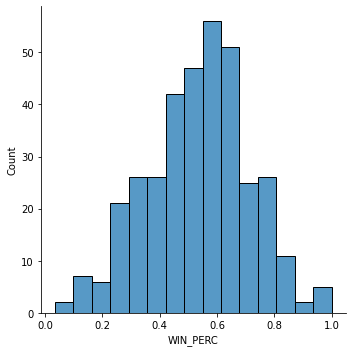

In [20]:
#win percentage looks like it has a pretty normal distribution for 2020 too
sns.displot(bb2['WIN_PERC'])

In [21]:
#make new sets of predictors and target for the 2020 season
X_test_bb2 = bb2.drop(['WIN_PERC', 'TEAM', 'CONF', 'BARTHAG', 'RK', 'G', 'W', 'WAB'], axis=1)
y_test_bb2 = bb2['WIN_PERC']

In [22]:
#use our model from above to make predictions 
predictions_bb2 = lm.predict(X_test_bb2)

<AxesSubplot:xlabel='Predicted Win Perc', ylabel='Actual Win Perc'>

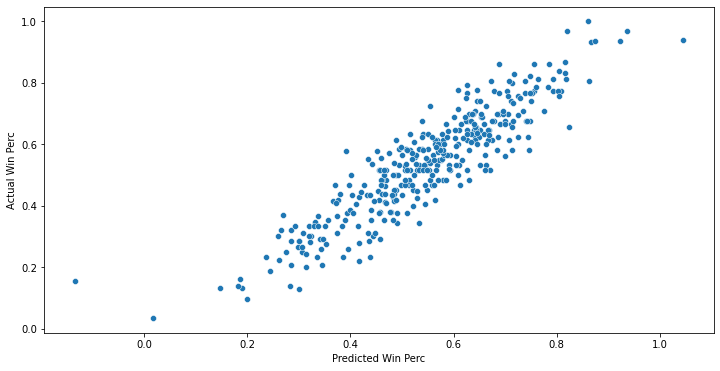

In [23]:
#see how our model from 2021 does for the 2020 data by comparing predictions and real win perc values - not too bad!
plt.figure(figsize=(12,6))
plt.xlabel('Predicted Win Perc')
plt.ylabel('Actual Win Perc')
sns.scatterplot(x=predictions_bb2, y=y_test_bb2)

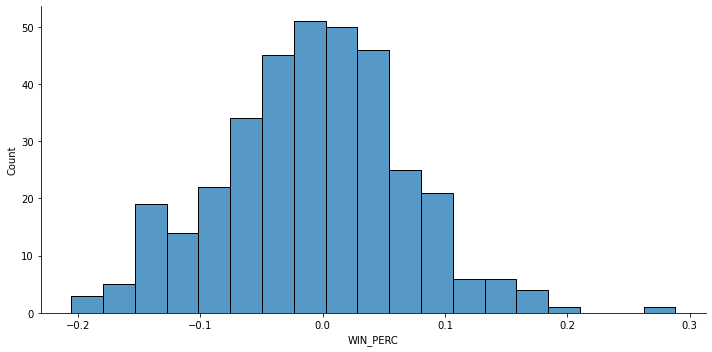

In [24]:
#we can again look at the distribution of residuals - normally distributed and not many extreme values
sns.displot((y_test_bb2-predictions_bb2), height=5, aspect=2)

In [25]:
print('R Square: ', lm.score(X_test_bb2, y_test_bb2))
print('MAE: ', metrics.mean_absolute_error(y_test_bb2, predictions_bb2)) #avg residual
print('MSE: ', metrics.mean_squared_error(y_test_bb2, predictions_bb2)) #variance of residuals
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_bb2, predictions_bb2))) #stdev of residuals

R Square:  0.8191242351333368
MAE:  0.05846999098138852
MSE:  0.005637968184982663
RMSE:  0.07508640479462753


### Interpretation

1. The model we trained on the 2021 season data did well on a novel data set for 2020 statistics from NCAAB. 
2. Once again, the scatterplot and distribution of residuals showed a fairly tight pattern, indicating relatively low residuals. Further, our model could account for almost 82% of variance in 2020 win perc, and the other measures of model fit were once again close to zero.

## 6) Final Summary

1. Using data from the NCAAB 2021 season, we were able to include several statistical basketball measures into a linear regression model that can predict a team's win perc with fairly good accuracy. 
2. Turnover Percentage Allowed (Turnover Rate; TOR) and Turnover Percentage Committed (Steal Rate; TORD) were the most important predictors when building the model, so teams may benefit from focusing on reducing turnovers and forcing the other team to turn the ball over just as much focusing on scoring in order to maximize their chances to win.
3. This model was also accurate in making predictions from the 2020 season, and can likely be generalized to other seasons.
4. Future exploration of these data can use different models to better predict win perc, as well as incorporate what conference a team belongs to into the model. 